In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
from autoencoders.plots import plot_grouped_history, plot_latent_space, plot_reconstruction_vae, \
        plot_labeled_latent_space_matrix
from autoencoders.datasets import load_cbf
from autoencoders.variational_autoencoder_v2 import build_vae

In [3]:
X_train, y_train, X_test, y_test = load_cbf()
input_shape = X_train.shape[1:]
latent_dim = 2  # number of latent dimensions


SHAPES:
TRAINING SET:  (420, 128, 1)
TEST SET:  (180, 128, 1)


In [5]:
autoencoder_kwargs = {
    "filters": [4, 4, 4, 4],
    "kernel_size": [3, 3, 3, 3],
    "padding": ["same", "same", "same", "same"],
    "activation": ["relu", "relu", "relu", "relu"],
    "pooling": [1, 1, 1, 1],
    "n_layers": 4,
    "optimizer": "adam",
    "n_layers_residual": None,
    "batch_normalization": None,
    "kl_weight": 0.1  # bigger -> more gaussian latent space; smaller -> less gaussian latent space
}

In [8]:
encoder, decoder, autoencoder = build_vae(input_shape, latent_dim, autoencoder_kwargs)

2022-02-25 10:49:02.593902: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 128, 4)            16        
_________________________________________________________________
activation (Activation)      (None, 128, 4)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 128, 4)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 4)            52        
_________________________________________________________________
activation_1 (Activation)    (None, 128, 4)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 128, 4)            0   

2022-02-25 10:49:03.706274: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [9]:
hist = autoencoder.fit(X_train, X_train, epochs=1000, validation_split=0.2)

2022-02-25 10:49:23.833092: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/1000
11/11 [==============================] - 4s 114ms/step - loss: 16.4516 - mse: 16.3713 - val_loss: 17.6961 - val_mse: 17.6501
Epoch 2/1000
11/11 [==============================] - 0s 26ms/step - loss: 16.8888 - mse: 16.8553 - val_loss: 17.4527 - val_mse: 17.4205
Epoch 3/1000
11/11 [==============================] - 0s 26ms/step - loss: 15.9442 - mse: 15.9221 - val_loss: 17.1168 - val_mse: 17.1154
Epoch 4/1000
11/11 [==============================] - 0s 26ms/step - loss: 15.8822 - mse: 15.8754 - val_loss: 16.7102 - val_mse: 16.6704
Epoch 5/1000
11/11 [==============================] - 0s 27ms/step - loss: 15.6882 - mse: 15.6542 - val_loss: 16.1062 - val_mse: 16.0109
Epoch 6/1000
11/11 [==============================] - 0s 28ms/step - loss: 14.2054 - mse: 14.1339 - val_loss: 15.1428 - val_mse: 15.0816
Epoch 7/1000
11/11 [==============================] - 0s 37ms/step - loss: 13.2328 - mse: 13.1053 - val_loss: 13.4989 - val_mse: 13.1620
Epoch 8/1000
11/11 [====================

Epoch 62/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.8711 - mse: 1.3111 - val_loss: 1.9080 - val_mse: 1.3222
Epoch 63/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.8902 - mse: 1.3383 - val_loss: 1.8444 - val_mse: 1.2690
Epoch 64/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.8756 - mse: 1.3128 - val_loss: 1.8850 - val_mse: 1.2948
Epoch 65/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.8696 - mse: 1.3192 - val_loss: 1.8738 - val_mse: 1.2936
Epoch 66/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.8884 - mse: 1.3168 - val_loss: 1.8659 - val_mse: 1.2969
Epoch 67/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.8400 - mse: 1.2874 - val_loss: 1.8654 - val_mse: 1.2656
Epoch 68/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.8564 - mse: 1.3062 - val_loss: 1.8740 - val_mse: 1.3528
Epoch 69/1000
11/11 [==============================] - 0s 25ms

Epoch 123/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.7350 - mse: 1.2270 - val_loss: 1.7180 - val_mse: 1.2111
Epoch 124/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.7192 - mse: 1.2175 - val_loss: 1.7300 - val_mse: 1.2300
Epoch 125/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.7120 - mse: 1.1967 - val_loss: 1.7212 - val_mse: 1.2277
Epoch 126/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.7215 - mse: 1.2437 - val_loss: 1.7216 - val_mse: 1.2245
Epoch 127/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.7218 - mse: 1.2012 - val_loss: 1.7206 - val_mse: 1.1930
Epoch 128/1000
11/11 [==============================] - 0s 30ms/step - loss: 1.7115 - mse: 1.2004 - val_loss: 1.7375 - val_mse: 1.2669
Epoch 129/1000
11/11 [==============================] - 0s 32ms/step - loss: 1.7338 - mse: 1.2389 - val_loss: 1.7237 - val_mse: 1.2059
Epoch 130/1000
11/11 [==============================] -

11/11 [==============================] - 0s 25ms/step - loss: 1.6924 - mse: 1.1978 - val_loss: 1.6914 - val_mse: 1.1857
Epoch 184/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.6929 - mse: 1.2369 - val_loss: 1.6670 - val_mse: 1.1423
Epoch 185/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.6802 - mse: 1.1930 - val_loss: 1.7030 - val_mse: 1.1291
Epoch 186/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.6834 - mse: 1.1665 - val_loss: 1.7187 - val_mse: 1.2346
Epoch 187/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.6938 - mse: 1.1833 - val_loss: 1.6812 - val_mse: 1.2125
Epoch 188/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.6798 - mse: 1.1927 - val_loss: 1.7135 - val_mse: 1.2441
Epoch 189/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.6718 - mse: 1.2113 - val_loss: 1.6882 - val_mse: 1.1996
Epoch 190/1000
11/11 [==============================] - 0s 28ms/step -

Epoch 244/1000
11/11 [==============================] - 0s 31ms/step - loss: 1.6035 - mse: 1.1922 - val_loss: 1.5996 - val_mse: 1.1645
Epoch 245/1000
11/11 [==============================] - 0s 28ms/step - loss: 1.5823 - mse: 1.1292 - val_loss: 1.5890 - val_mse: 1.1358
Epoch 246/1000
11/11 [==============================] - 0s 32ms/step - loss: 1.6010 - mse: 1.1706 - val_loss: 1.5810 - val_mse: 1.1410
Epoch 247/1000
11/11 [==============================] - 0s 29ms/step - loss: 1.5832 - mse: 1.1350 - val_loss: 1.5908 - val_mse: 1.1919
Epoch 248/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.5896 - mse: 1.1704 - val_loss: 1.5749 - val_mse: 1.2015
Epoch 249/1000
11/11 [==============================] - 0s 32ms/step - loss: 1.5879 - mse: 1.1658 - val_loss: 1.5721 - val_mse: 1.1658
Epoch 250/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.5917 - mse: 1.1700 - val_loss: 1.5826 - val_mse: 1.1461
Epoch 251/1000
11/11 [==============================] -

Epoch 305/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.5011 - mse: 1.1017 - val_loss: 1.5269 - val_mse: 1.1910
Epoch 306/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.5280 - mse: 1.1298 - val_loss: 1.4933 - val_mse: 1.0687
Epoch 307/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.5067 - mse: 1.1278 - val_loss: 1.5110 - val_mse: 1.1130
Epoch 308/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.5055 - mse: 1.1284 - val_loss: 1.5122 - val_mse: 1.0730
Epoch 309/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.5053 - mse: 1.0825 - val_loss: 1.4952 - val_mse: 1.1396
Epoch 310/1000
11/11 [==============================] - 0s 28ms/step - loss: 1.5453 - mse: 1.1690 - val_loss: 1.4938 - val_mse: 1.1132
Epoch 311/1000
11/11 [==============================] - 0s 38ms/step - loss: 1.5110 - mse: 1.1004 - val_loss: 1.4848 - val_mse: 1.1031
Epoch 312/1000
11/11 [==============================] -

Epoch 366/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.5072 - mse: 1.1271 - val_loss: 1.5133 - val_mse: 1.0823
Epoch 367/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.5276 - mse: 1.1080 - val_loss: 1.5082 - val_mse: 1.0953
Epoch 368/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.4993 - mse: 1.0805 - val_loss: 1.5497 - val_mse: 1.1510
Epoch 369/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.5088 - mse: 1.0937 - val_loss: 1.4699 - val_mse: 1.0631
Epoch 370/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.4772 - mse: 1.1024 - val_loss: 1.4472 - val_mse: 1.0702
Epoch 371/1000
11/11 [==============================] - 0s 28ms/step - loss: 1.4788 - mse: 1.1122 - val_loss: 1.4652 - val_mse: 1.0797
Epoch 372/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.4998 - mse: 1.1030 - val_loss: 1.4813 - val_mse: 1.1009
Epoch 373/1000
11/11 [==============================] -

Epoch 427/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.5092 - mse: 1.0961 - val_loss: 1.4722 - val_mse: 1.0996
Epoch 428/1000
11/11 [==============================] - 0s 30ms/step - loss: 1.4784 - mse: 1.1120 - val_loss: 1.4406 - val_mse: 1.0505
Epoch 429/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.4853 - mse: 1.0883 - val_loss: 1.4670 - val_mse: 1.0917
Epoch 430/1000
11/11 [==============================] - 0s 28ms/step - loss: 1.5186 - mse: 1.1105 - val_loss: 1.4584 - val_mse: 1.0729
Epoch 431/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.4843 - mse: 1.0941 - val_loss: 1.4852 - val_mse: 1.1236
Epoch 432/1000
11/11 [==============================] - 0s 29ms/step - loss: 1.4798 - mse: 1.0806 - val_loss: 1.4758 - val_mse: 1.0996
Epoch 433/1000
11/11 [==============================] - 0s 28ms/step - loss: 1.4847 - mse: 1.0831 - val_loss: 1.4754 - val_mse: 1.0797
Epoch 434/1000
11/11 [==============================] -

Epoch 488/1000
11/11 [==============================] - 0s 20ms/step - loss: 1.4744 - mse: 1.0948 - val_loss: 1.4995 - val_mse: 1.1043
Epoch 489/1000
11/11 [==============================] - 0s 21ms/step - loss: 1.4580 - mse: 1.0695 - val_loss: 1.4512 - val_mse: 1.0876
Epoch 490/1000
11/11 [==============================] - 0s 21ms/step - loss: 1.4706 - mse: 1.0909 - val_loss: 1.4576 - val_mse: 1.0816
Epoch 491/1000
11/11 [==============================] - 0s 22ms/step - loss: 1.4522 - mse: 1.0667 - val_loss: 1.4620 - val_mse: 1.0839
Epoch 492/1000
11/11 [==============================] - 0s 22ms/step - loss: 1.4701 - mse: 1.0788 - val_loss: 1.4409 - val_mse: 1.0819
Epoch 493/1000
11/11 [==============================] - 0s 22ms/step - loss: 1.4669 - mse: 1.0810 - val_loss: 1.4784 - val_mse: 1.0581
Epoch 494/1000
11/11 [==============================] - 0s 22ms/step - loss: 1.4760 - mse: 1.0673 - val_loss: 1.4224 - val_mse: 1.0448
Epoch 495/1000
11/11 [==============================] -

Epoch 549/1000
11/11 [==============================] - 0s 29ms/step - loss: 1.4504 - mse: 1.0574 - val_loss: 1.4834 - val_mse: 1.0879
Epoch 550/1000
11/11 [==============================] - 0s 34ms/step - loss: 1.4522 - mse: 1.0644 - val_loss: 1.5431 - val_mse: 1.1884
Epoch 551/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.4427 - mse: 1.0581 - val_loss: 1.4315 - val_mse: 1.0601
Epoch 552/1000
11/11 [==============================] - 0s 33ms/step - loss: 1.4598 - mse: 1.1170 - val_loss: 1.4478 - val_mse: 1.0804
Epoch 553/1000
11/11 [==============================] - 0s 33ms/step - loss: 1.4784 - mse: 1.1150 - val_loss: 1.4800 - val_mse: 1.0514
Epoch 554/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.4743 - mse: 1.0384 - val_loss: 1.4364 - val_mse: 1.0451
Epoch 555/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.4639 - mse: 1.0709 - val_loss: 1.4686 - val_mse: 1.0981
Epoch 556/1000
11/11 [==============================] -

Epoch 610/1000
11/11 [==============================] - 0s 23ms/step - loss: 1.4765 - mse: 1.1178 - val_loss: 1.4907 - val_mse: 1.1341
Epoch 611/1000
11/11 [==============================] - 0s 22ms/step - loss: 1.4497 - mse: 1.0482 - val_loss: 1.5182 - val_mse: 1.1992
Epoch 612/1000
11/11 [==============================] - 0s 21ms/step - loss: 1.5096 - mse: 1.1534 - val_loss: 1.4909 - val_mse: 1.1029
Epoch 613/1000
11/11 [==============================] - 0s 22ms/step - loss: 1.4490 - mse: 1.1031 - val_loss: 1.5029 - val_mse: 1.1419
Epoch 614/1000
11/11 [==============================] - 0s 45ms/step - loss: 1.4570 - mse: 1.0944 - val_loss: 1.4341 - val_mse: 1.0738
Epoch 615/1000
11/11 [==============================] - 0s 23ms/step - loss: 1.4663 - mse: 1.1089 - val_loss: 1.5110 - val_mse: 1.1021
Epoch 616/1000
11/11 [==============================] - 1s 52ms/step - loss: 1.4693 - mse: 1.0678 - val_loss: 1.4418 - val_mse: 1.0364
Epoch 617/1000
11/11 [==============================] -

Epoch 671/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.4634 - mse: 1.0842 - val_loss: 1.4674 - val_mse: 1.0206
Epoch 672/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.5197 - mse: 1.1469 - val_loss: 1.5008 - val_mse: 1.0559
Epoch 673/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.4660 - mse: 1.0529 - val_loss: 1.4487 - val_mse: 1.0903
Epoch 674/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.4688 - mse: 1.1003 - val_loss: 1.4592 - val_mse: 1.0324
Epoch 675/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.4583 - mse: 1.0918 - val_loss: 1.4142 - val_mse: 1.0457
Epoch 676/1000
11/11 [==============================] - 0s 29ms/step - loss: 1.4474 - mse: 1.0859 - val_loss: 1.5085 - val_mse: 1.1547
Epoch 677/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.4370 - mse: 1.0748 - val_loss: 1.5294 - val_mse: 1.1721
Epoch 678/1000
11/11 [==============================] -

Epoch 732/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.4811 - mse: 1.0701 - val_loss: 1.5338 - val_mse: 1.2255
Epoch 733/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.4351 - mse: 1.0647 - val_loss: 1.4138 - val_mse: 1.0281
Epoch 734/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.4350 - mse: 1.0765 - val_loss: 1.4321 - val_mse: 1.0314
Epoch 735/1000
11/11 [==============================] - 0s 31ms/step - loss: 1.4417 - mse: 1.0632 - val_loss: 1.4652 - val_mse: 1.1075
Epoch 736/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.4651 - mse: 1.0962 - val_loss: 1.5148 - val_mse: 1.1222
Epoch 737/1000
11/11 [==============================] - 0s 32ms/step - loss: 1.4377 - mse: 1.0684 - val_loss: 1.4434 - val_mse: 1.0936
Epoch 738/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.4443 - mse: 1.0828 - val_loss: 1.4832 - val_mse: 1.1147
Epoch 739/1000
11/11 [==============================] -

Epoch 793/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.4351 - mse: 1.0782 - val_loss: 1.4651 - val_mse: 1.1050
Epoch 794/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.4475 - mse: 1.0736 - val_loss: 1.4713 - val_mse: 1.0956
Epoch 795/1000
11/11 [==============================] - 0s 31ms/step - loss: 1.4400 - mse: 1.0568 - val_loss: 1.4298 - val_mse: 1.0314
Epoch 796/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.4809 - mse: 1.1040 - val_loss: 1.4590 - val_mse: 1.1028
Epoch 797/1000
11/11 [==============================] - 0s 28ms/step - loss: 1.4335 - mse: 1.0548 - val_loss: 1.4386 - val_mse: 1.0533
Epoch 798/1000
11/11 [==============================] - 0s 27ms/step - loss: 1.4531 - mse: 1.0480 - val_loss: 1.4378 - val_mse: 1.0447
Epoch 799/1000
11/11 [==============================] - 0s 41ms/step - loss: 1.4506 - mse: 1.0909 - val_loss: 1.4573 - val_mse: 1.0198
Epoch 800/1000
11/11 [==============================] -

Epoch 854/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.4449 - mse: 1.0565 - val_loss: 1.4161 - val_mse: 1.0756
Epoch 855/1000
11/11 [==============================] - 0s 32ms/step - loss: 1.4432 - mse: 1.0592 - val_loss: 1.4888 - val_mse: 1.1091
Epoch 856/1000
11/11 [==============================] - 0s 29ms/step - loss: 1.4447 - mse: 1.0857 - val_loss: 1.4133 - val_mse: 1.0391
Epoch 857/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.4143 - mse: 1.0631 - val_loss: 1.4074 - val_mse: 1.0506
Epoch 858/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.4360 - mse: 1.0567 - val_loss: 1.4260 - val_mse: 1.0562
Epoch 859/1000
11/11 [==============================] - 0s 22ms/step - loss: 1.4621 - mse: 1.0923 - val_loss: 1.4771 - val_mse: 1.0846
Epoch 860/1000
11/11 [==============================] - 0s 23ms/step - loss: 1.4490 - mse: 1.0611 - val_loss: 1.4576 - val_mse: 1.0749
Epoch 861/1000
11/11 [==============================] -

Epoch 915/1000
11/11 [==============================] - 0s 23ms/step - loss: 1.4202 - mse: 1.0675 - val_loss: 1.4379 - val_mse: 1.0921
Epoch 916/1000
11/11 [==============================] - 0s 23ms/step - loss: 1.4327 - mse: 1.0796 - val_loss: 1.4696 - val_mse: 1.0910
Epoch 917/1000
11/11 [==============================] - 0s 23ms/step - loss: 1.4474 - mse: 1.0962 - val_loss: 1.4460 - val_mse: 1.0757
Epoch 918/1000
11/11 [==============================] - 0s 24ms/step - loss: 1.4559 - mse: 1.0748 - val_loss: 1.4108 - val_mse: 1.0384
Epoch 919/1000
11/11 [==============================] - 0s 22ms/step - loss: 1.4394 - mse: 1.0807 - val_loss: 1.4447 - val_mse: 1.0659
Epoch 920/1000
11/11 [==============================] - 0s 23ms/step - loss: 1.4476 - mse: 1.0617 - val_loss: 1.4503 - val_mse: 1.1130
Epoch 921/1000
11/11 [==============================] - 0s 31ms/step - loss: 1.4507 - mse: 1.0675 - val_loss: 1.5010 - val_mse: 1.0757
Epoch 922/1000
11/11 [==============================] -

Epoch 976/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.4628 - mse: 1.1149 - val_loss: 1.4358 - val_mse: 1.0593
Epoch 977/1000
11/11 [==============================] - 0s 28ms/step - loss: 1.4346 - mse: 1.0501 - val_loss: 1.4470 - val_mse: 1.0398
Epoch 978/1000
11/11 [==============================] - 0s 26ms/step - loss: 1.4587 - mse: 1.0912 - val_loss: 1.4312 - val_mse: 1.0369
Epoch 979/1000
11/11 [==============================] - 0s 25ms/step - loss: 1.4577 - mse: 1.0625 - val_loss: 1.4172 - val_mse: 1.0200
Epoch 980/1000
11/11 [==============================] - 0s 28ms/step - loss: 1.4413 - mse: 1.0678 - val_loss: 1.4379 - val_mse: 1.0517
Epoch 981/1000
11/11 [==============================] - 0s 39ms/step - loss: 1.4240 - mse: 1.0418 - val_loss: 1.4624 - val_mse: 1.0816
Epoch 982/1000
11/11 [==============================] - 1s 48ms/step - loss: 1.4475 - mse: 1.0488 - val_loss: 1.4299 - val_mse: 1.0358
Epoch 983/1000
11/11 [==============================] -

In [11]:
autoencoder.evaluate(X_test, X_test)

6/6 [==============================] - 0s 6ms/step - loss: 1.4296 - mse: 1.0686


[1.429569125175476, 1.0686213970184326]

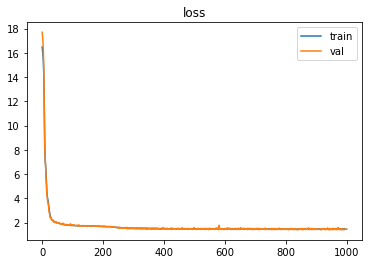

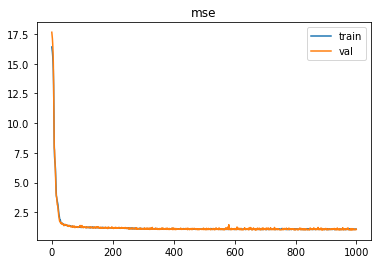

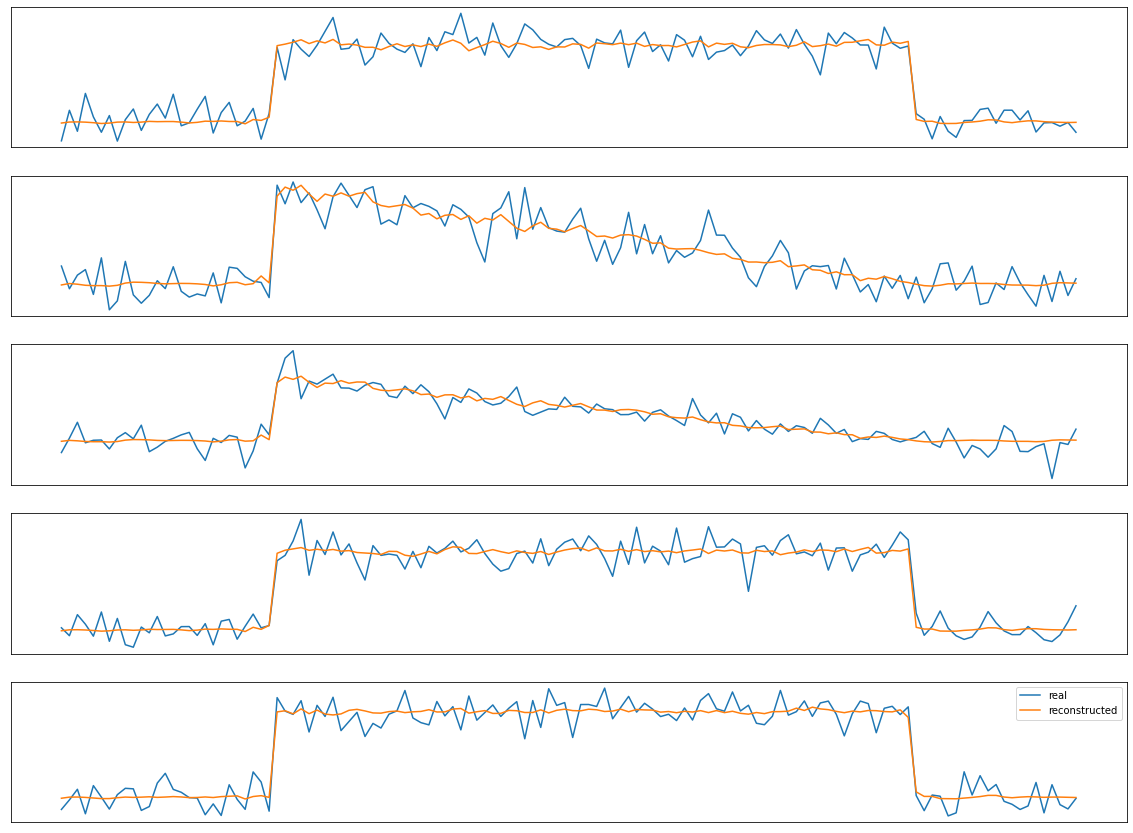

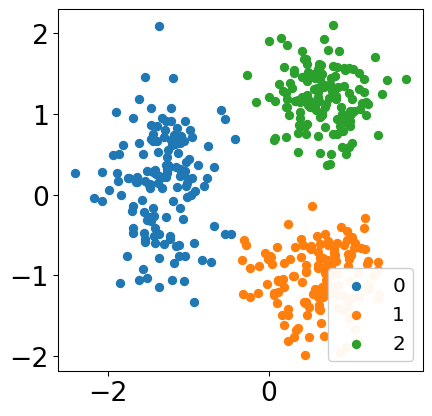

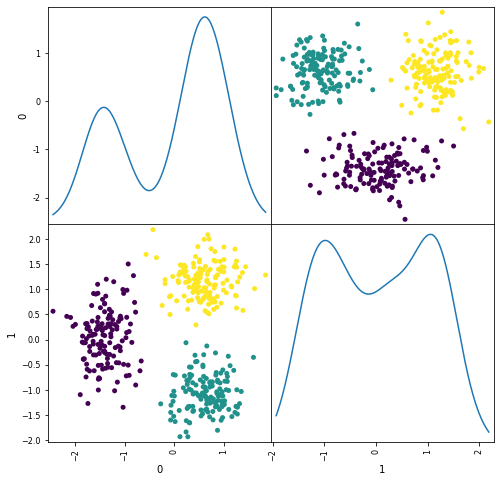

In [10]:
plot_grouped_history(hist.history)
plot_reconstruction_vae(X_train[:5], encoder, decoder)
plot_latent_space(encoder.predict(X_train), y_train)
plot_labeled_latent_space_matrix(encoder.predict(X_train), y_train)